# Average expression barcharts

## Import statements

In [1]:
import os,sys
import datetime

In [2]:
import scanpy as sc
sc.logging.print_versions()
sc.logging.print_memory_usage()
sc.settings.verbosity = 2

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.7 numpy==1.15.4 scipy==1.3.1 pandas==0.23.4 scikit-learn==0.20.1 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1
Memory usage: current 0.20 GB, difference +0.20 GB


In [3]:
import scipy.cluster
from matplotlib_venn import venn2

In [4]:
## This cell is run once to download my custom functions and import statements from github
#
#!git clone --depth=1 https://github.com/rapolaszilionis/utility_functions
#    
## github doesn't seem to have an option to download a specific version of the repo from the history.
## So I download my utility functions and save the download time by appending it to the directory name.
## These utility functions to be shared together with the notebook.
#
#toappend = datetime.datetime.now().strftime('%y%m%d_%Hh%M')
#newname = "utility_functions_%s"%toappend
#print(newname)
#
#
## rename the py file with utility functions
#os.rename("utility_functions",newname)

In [5]:
# add the utility function folder to PATH
sys.path.append(os.path.abspath("utility_functions_210525_14h42/"))

from rz_import_statements import *
import rz_functions as rz
import rz_fig_params # this adjust mpl.rcParams, almost nothing to import, import after scanpy to overwrite rc.Params
import rz_utility_spring as srz

python version: 3.6.7


## Load data

In [6]:
adata = sc.read_h5ad('backups/mito_total_counts_filt_raw_32415x36601_210622_20h17.h5ad')

In [7]:
# load obs with classifier results
adata.obs = rz.load_df('backups/obs_info_32415x18_211010_11h51.npz')

In [8]:
# normalize
sc.pp.normalize_per_cell(adata,counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


## Color dictionaries

In [9]:
cdd = {}
cdd['condition'] = {'Control': '#ffe500', 'KIPyV VLPs': '#00d4ff', 'MCPyV VLPs': '#00007f'}
cdd['population'] = {
 'AI': '#5eff0d',
 'AII': '#49a300',
 'Dead': '#ff9900',
 'HA': '#114a0e',
 'IR': '#ff0000',
 'MA': '#00007f',
 'PA': '#fff757',
 'RS': '#0088ff',
 'SS': '#0cf4e8'}

## Get centroids

In [10]:
centrdict = {}
for cond in adata.obs['condition'].unique():
    condmask = adata.obs['condition'] == cond
    condmask = condmask.values
    centrdict[cond] = rz.centroids("population",adata[condmask])

### Plot some gene

/Users/rapolaszilionis/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


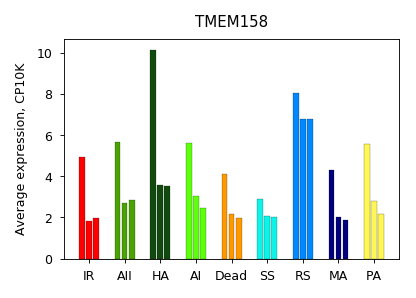

In [12]:
gene = 'TMEM158'

####################
customorder = ['IR', 'AII', 'HA', 'AI', 'Dead', 'SS', 'RS', 'MA', 'PA']

df = {}
for key,value in centrdict.items():
    df[key] = value[gene]
    
df = pd.DataFrame(df)
df = df.loc[customorder]

a,fig,gs = rz.startfig(7,5)

x = np.arange(df.shape[0])*5

for col in df.columns:
    h = df[col]
    a.bar(x,h,color=[cdd['population'][i] for i in h.index],lw=0.1,edgecolor='k')
    x+=1
    
a.set_ylabel('Average expression, CP10K')
    
a.set_xticks(x-2)
a.set_xticklabels(h.index)
a.set_title(gene)

gs.tight_layout(fig)
plt.savefig("postannotoutputs/bars_%s.pdf"%gene)